# Rozpoznawanie obraz√≥w i testy atak√≥w adwersarialnych<br>(ang. *Image Classification and Adversarial Attack Testing*)

> Rozpoznawanie obraz√≥w z wykorzystaniem bazy danych **CIFAR-100** oraz pr√≥ba przeprowadzenia atak√≥w adwersarialnych na wytrenowany model.

Uwaga ‚ùï  
Poni≈ºszy projekt by≈Ç realizowany przy u≈ºyciu ≈õrodowiska **Google Colaboratory**.  
Zalecane jest u≈ºywanie tego ≈õrodowiska w celu poprawnej instalacji i poprawnego u≈ºycia pakiet√≥w.

In [ ]:
!pip install cleverhans

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 92.3/92.3 kB 774.9 kB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154.7/154.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
import numpy as np

# Tworzenie modelu


## **Warstwa wej≈õciowa**


Liczba filtr√≥w (detektor√≥w cech) - 32 r√≥≈ºne wzorce

32 - liczba neuron√≥w
```
filters = 32
```

Rozmiar filtra (3x3 piksele) - ka≈ºdy filtr przesuwa siƒô po obrazie jako kwadrat 3x3 px (operacja splotu)
```
kernel_size = (3, 3)
```
Funkcja aktywacji ReLU

***f(x) = max(0, x)***

```
activation = 'relu'
```
Rozmiar wej≈õcia - obrazu (32x32 px, 3 kana≈Çy RGB).  
Poniewa≈º zbi√≥r CIFAR-100 zawiera obrazy o wymiarach 32x32 px.
```
input_shape = (32, 32, 3)
```


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(
    filters = 32,              # Liczba filtr√≥w (detektor√≥w cech) - 32 r√≥≈ºne wzorce
    kernel_size = (3, 3),      # Rozmiar filtra (3x3 piksele)
    activation = 'relu',       # Funkcja aktywacji ReLU
    input_shape = (32, 32, 3), # Rozmiar obrazu (32x32, 3 kana≈Çy RGB)
    padding = 'same'           # Dodaje odpowiednie zera do brzeg√≥w obrazu, aby zachowaƒá jego wymiary po konwolucji
))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Warstwa MaxPooling**

> **Warstwa zmniejsza rozmiar danych. Redukuje rozdzielczo≈õƒá obrazu, przyspiesza obliczenia i ogranicza ryzyko przeuczenia.**

Dzieli obraz na bloki 2x2 i wybiera najwiƒôkszƒÖ warto≈õƒá z ka≈ºdego bloku.

W uproszczeniu dzieli aktualny rozmiar obrazu przez 2. Np 32x32 -> MaxPooling -> 16x16 itd
```
pool_size = (2,2)
```


In [ ]:
model.add(layers.MaxPooling2D(pool_size = (2,2)))

## **Warstwy konwolucyjne**

> Dodanie kolejnych warstw w celu rozpoznawania bardziej z≈Ço≈ºonych wzorc√≥w

Funkcja odpowiedzialna za dodawanie warstw konwolucyjnych, jako parametr przyjmuje `conv_layer` w postaci tablicy:

Przyk≈Çad: ( [64, 64] ) - dwie warstwy konwolucyjne po 64 neurony

Oraz parametr `input_shape`, kt√≥ry jest reprezentacjƒÖ wymiaru danych wej≈õciowych (np 32x32 pixele = (32, 32))
```
def add_conv_layers(conv_layer, input_shape)
```

In [ ]:
def add_conv_layers(conv_layers, input_shape):
    for conv_layer in conv_layers:
        model.add(layers.Conv2D(conv_layer, (3, 3), activation = 'relu', padding='same'))

        if input_shape > (4, 4):
            model.add(layers.MaxPooling2D((2,2)))
            input_shape = tuple(int(x / 2) for x in input_shape)

Wywo≈Çanie funkcji (stworzenie warstw)

`model.input_shape[1:3]` - poniewa≈º chcemy wyciƒÖgnƒÖƒá tylko rozmiar obrazu kt√≥ry wrzucamy w sieƒá neuronowƒÖ

In [ ]:
inp_sh = tuple(int(x / 2) for x in model.input_shape[1:3])
print(inp_sh)

(16, 16)


In [ ]:
add_conv_layers([64, 128, 256, 256], inp_sh)

## **Warstwa sp≈ÇaszczajƒÖca**

> Stosowana poniewa≈º po warstwach konwolucyjnych dane majƒÖ kszta≈Çt tr√≥jwymiarowy (wysoko≈õƒá x szeroko≈õƒá x kana≈Çy). Musimy je zmieniƒá na wektor w celu klasyfikacji.

Zmiana danych np. (7, 7, 64) na wektor 7 x 7 x 64 = 3136

Pierwotne podej≈õcie:  
`model.add(layers.Flatten())`

Nowe podej≈õcie:   
`model.add(layers.GlobalAveragePooling2D())`

In [ ]:
model.add(layers.GlobalAveragePooling2D())

## **Warstwa w pe≈Çni po≈ÇƒÖczona (Dense)**

> Warstwa gƒôsta - klasyczna warstwa neuronowa

128 - liczba neuron√≥w w warstwie gƒôstej

In [ ]:
model.add(layers.Dense(128, activation = 'relu'))

## **Warstwa wyj≈õciowa**

> Ostatnia warstwa, odpowiedzialna za przewidywanie klas.

`model.add(layers.Dense(10, activation = 'softmax'))`

100 - liczba neuron√≥w

<br>

###‚ùî **Dlaczego 100**

Dla zbioru CIFAR-100 jest 100 klas

0: jab≈Çko, 1: ryba, ..., 100: robak

<br>
‚ùï W przysz≈Ço≈õci liczbƒô mo≈ºna zastƒÖpiƒá zmiennƒÖ *num_classes*

In [ ]:
model.add(layers.Dense(10, activation = 'softmax'))

## Ostateczny wyglƒÖd modelu

In [ ]:
model.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 32, 32, 32)     ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 16, 16, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 16, 16, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 8, 8, 64)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 8, 8, 128)      ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 4, 4, 128)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_3 (Conv2D)               ‚îÇ (None, 4, 4, 256)      ‚îÇ       295,168 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_4 (Conv2D)               ‚îÇ (None, 4, 4, 256)      ‚îÇ       590,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_average_pooling2d        ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îÇ (GlobalAveragePooling2D)        ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 10)             ‚îÇ         1,290 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 1,012,682 (3.86 MB)

 Trainable params: 1,012,682 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

# Kompilacja modelu

Decyduje w jaki spos√≥b model aktualizuje swoje wagi podczas uczenia

- *Adaptive Moment Estimation* - efektywny optymalizator dobrze radzƒÖcy sobie z obrazami

```
optimizer = 'adam'
```
Mierzy jak bardzo przewidywania odbiegajƒÖ od rzeczywisto≈õci.

- SCC poniewa≈º klasy sƒÖ postaci liczbowej (0-9)
- jest dobra dla problem√≥w wieloklasowej klasyfikacji

```
loss = 'sparse_categorical_crossentropy'
```
Monitoruje skuteczno≈õƒá modelu (dok≈Çadno≈õƒá ang. *accuracy*)

```
metrics = ['accuracy']
```

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Trenowanie modelu

> Do trenowania modelu zosta≈Ç u≈ºyty zbi√≥r **CIFAR-10** dostƒôpny w TensorFlow

Pobranie zbioru

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 0us/step


Normalizacja danych (przeskalowanie do zakresu 0-1)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f'Rozmiar zbioru treningowego: {x_train.shape}')
print(f'Rozmiar zbioru testowego: {x_test.shape}')

Rozmiar zbioru treningowego: (50000, 32, 32, 3)
Rozmiar zbioru testowego: (10000, 32, 32, 3)


Klasy

In [ ]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train.shape

(50000, 32, 32, 3)

## Uruchomienie procesu trenowania

Dane treningowe w postaci obraz√≥w i etykiet

```
x_train, y_train
```
Liczba epok treningowych (im wiƒôcej tym lepsze wyniki **w teorii** )

```
epochs = 10
```
20% danych treningowych zostanie u≈ºyte jako dane walidacyjne (do weryfikacji czy model siƒô nie przeucza)

```
validation_split = 0.2
```

Model aktualizuje wagi po 64 obrazach
```
batch_size = 64
```

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs = 10,
                    validation_split = 0.2,
                    batch_size = 64)

Epoch 1/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 221s 349ms/step - accuracy: 0.2627 - loss: 1.8942 - val_accuracy: 0.4829 - val_loss: 1.3755
Epoch 2/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 266s 356ms/step - accuracy: 0.5209 - loss: 1.2830 - val_accuracy: 0.6049 - val_loss: 1.0998
Epoch 3/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 248s 334ms/step - accuracy: 0.6280 - loss: 1.0417 - val_accuracy: 0.6685 - val_loss: 0.9232
Epoch 4/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 264s 338ms/step - accuracy: 0.6948 - loss: 0.8668 - val_accuracy: 0.7049 - val_loss: 0.8441
Epoch 5/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 268s 346ms/step - accuracy: 0.7338 - loss: 0.7503 - val_accuracy: 0.7191 - val_loss: 0.8067
Epoch 6/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 252s 331ms/step - accuracy: 0.7673 - loss: 0.6521 - val_accu

## Sprawdzenie dok≈Çadno≈õci modelu

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Dok≈Çadno≈õƒá modelu: {test_acc:.2f}')

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 37ms/step - accuracy: 0.7365 - loss: 0.8535
Dok≈Çadno≈õƒá modelu: 0.73


## Wizualizacja treningu

In [ ]:
import matplotlib.pyplot as plt

Dok≈Çadno≈õƒá

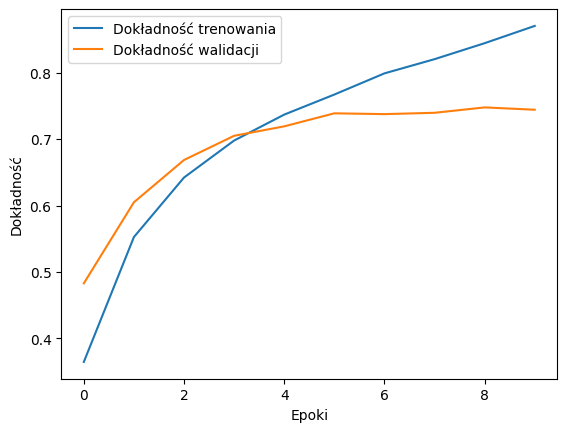

In [ ]:
plt.plot(history.history['accuracy'], label = 'Dok≈Çadno≈õƒá trenowania')
plt.plot(history.history['val_accuracy'], label = 'Dok≈Çadno≈õƒá walidacji')
plt.xlabel('Epoki')
plt.ylabel('Dok≈Çadno≈õƒá')
plt.legend()

Strata

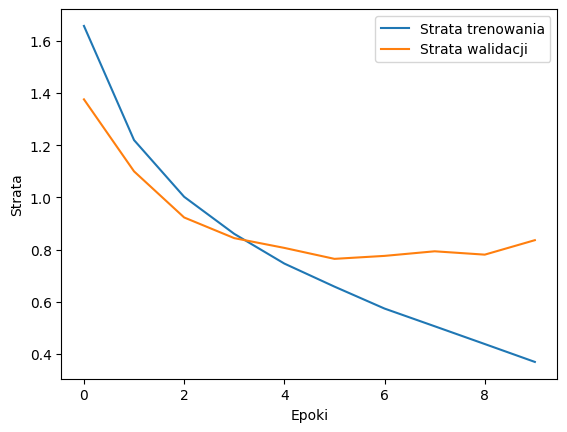

In [ ]:
plt.plot(history.history['loss'], label = 'Strata trenowania')
plt.plot(history.history['val_loss'], label = 'Strata walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

## Zapisanie modelu

In [ ]:
model.save('Models/cifar10_73.keras')

# Wczytanie modelu

Nazwa modelu: `cifar100_dok≈Çadno≈õƒá-modelu`   
Przyk≈Çad: `cifar100_99` dla modelu o dok≈Çadno≈õci 99%

In [ ]:
from tensorflow.keras.models import load_model

‚ùó Wczytanie

In [ ]:
model = model = models.Sequential()

`cifar100_37` - Warstwy konwolucyjne: [64, 128] dla zbioru danych **CIFAR-100**

In [ ]:
model = load_model('Models/cifar100_37.keras') # Wczytanie modelu z dok≈Çadno≈õciƒÖ 37%

`cifar10_73` - Warstwy konwolucyjne: [64, 128, 256, 256] dla zbioru danych **CIFAR-10**

In [ ]:
model = load_model('Models/cifar10_73.keras') # Wczytanie modelu z dok≈Çadno≈õciƒÖ 73%

# Testowanie modelu

## Testy na w≈Çasnych obrazach

Etykiety CIFAR-10

In [ ]:
cifar10_labels = [
    'samolot', 'samoch√≥d', 'ptak', 'kot', 'jele≈Ñ', 'pies', '≈º√≥≈Çw', 'je≈º',
    'kon', 'statek'
]

Etykiety CIFAR-100

In [ ]:
cifar100_labels = [
    'jab≈Çko', 'ryba akwariowa', 'niemowlƒô', 'nied≈∫wied≈∫', 'b√≥br', '≈Ç√≥≈ºko', 'pszczo≈Ça', '≈ºuk',
    'rower', 'butelka', 'miska', 'ch≈Çopiec', 'most', 'autobus', 'motyl', 'wielb≈ÇƒÖd',
    'puszka', 'zamek', 'gƒÖsienica', 'byd≈Ço', 'krzes≈Ço', 'szympans', 'zegar',
    'chmura', 'karaluch', 'kanapa', 'krab', 'krokodyl', 'fili≈ºanka', 'dinozaur',
    'delfin', 's≈Ço≈Ñ', 'p≈Çastuga', 'las', 'lis', 'dziewczynka', 'chomik',
    'dom', 'kangur', 'klawiatura', 'lampa', 'kosiarka do trawy', 'lampart', 'lew',
    'jaszczurka', 'homar', 'mƒô≈ºczyzna', 'klon', 'motocykl', 'g√≥ra', 'mysz',
    'grzyb', 'dƒÖb', 'pomara≈Ñcza', 'orchidea', 'wydra', 'palma', 'gruszka',
    'pickup', 'sosna', 'r√≥wnina', 'talerz', 'mak', 'je≈ºozwierz',
    'opos', 'kr√≥lik', 'szop pracz', 'p≈Çaszczka', 'droga', 'rakieta', 'r√≥≈ºa',
    'morze', 'foka', 'rekin', 'ryj√≥wka', 'skunks', 'drapacz chmur', '≈õlimak', 'wƒÖ≈º',
    'pajƒÖk', 'wiewi√≥rka', 'tramwaj', 's≈Çonecznik', 'papryka', 'st√≥≈Ç',
    'czo≈Çg', 'telefon', 'telewizor', 'tygrys', 'ciƒÖgnik', 'pociƒÖg', 'pstrƒÖg',
    'tulipan', '≈º√≥≈Çw', 'szafa', 'wieloryb', 'wierzba', 'wilk', 'kobieta',
    'robak'
]


In [ ]:
from tensorflow.keras.preprocessing import image

## Klasyfikacja obrazka

Wczytanie obrazka

In [ ]:
img_path = 'Images/jelen.jpg'

Przetworzenie obrazka na wektor

In [ ]:
def prepare_image(img_path):
    img_ = image.load_img(img_path, target_size=(32, 32))

    img_array = image.img_to_array(img_)

    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis = 0)

    return img_array

def prepare_image_512(img_path):
    img_ = image.load_img(img_path, target_size=(512, 512))

    img_array = image.img_to_array(img_)

    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis = 0)

    return img_array


Rozmiar obrazu po klasyfikacji: (1, 32, 32, 3)


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

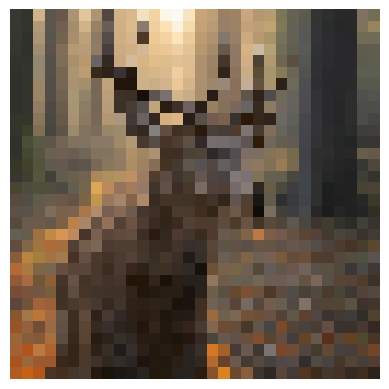

In [ ]:
img_array = prepare_image(img_path)

print(f"Rozmiar obrazu po klasyfikacji: {img_array.shape}")
plt.imshow(img_array[0])
plt.axis('off')

Klasyfikacja obrazka

In [ ]:
def classify_image(img_array):
    predictions = model.predict(img_array)

    predicted_class = np.argmax(predictions)

    print(f'\nTo prawdopodobnie {cifar10_labels[predicted_class]}')

    plt.imshow(img_array[0])
    plt.axis('off')


def classify_image_details(img_array):
    predictions = model.predict(img_array)

    print("\nWynik prawdopodobie≈Ñstw dla ka≈ºdej z klas:")
    for i, prob in enumerate(predictions[0]):
        print(f'{i}: {cifar10_labels[i]}: {prob:.4f}')

    predicted_class = np.argmax(predictions)

    print(f'\nNumer przewidzianej klasy: {predicted_class}')
    print(f'\nZ prawdopodobie≈Ñstwem: {predictions[0][predicted_class] * 100:.2f}%')
    print(f'\nTo prawdopodobnie {cifar10_labels[predicted_class]}')

def classify_image_text(img_array):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    return cifar10_labels[predicted_class], f"{predictions[0][predicted_class] * 100:.2f}%"

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 315ms/step

To prawdopodobnie jele≈Ñ


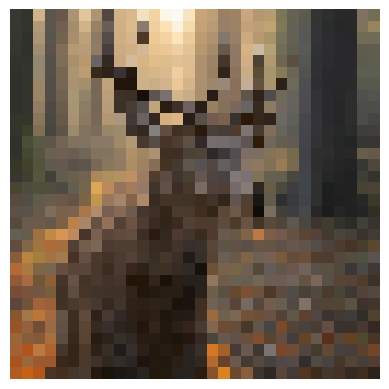

In [ ]:
classify_image(img_array)

In [ ]:
classify_image_details(img_array)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step

Wynik prawdopodobie≈Ñstw dla ka≈ºdej z klas:
0: samolot: 0.0001
1: samoch√≥d: 0.0000
2: ptak: 0.0141
3: kot: 0.0077
4: jele≈Ñ: 0.9634
5: pies: 0.0074
6: ≈º√≥≈Çw: 0.0013
7: je≈º: 0.0061
8: kon: 0.0000
9: statek: 0.0000

Numer przewidzianej klasy: 4

Z prawdopodobie≈Ñstwem: 96.34%

To prawdopodobnie jele≈Ñ


In [ ]:
classify_image_text(img_array)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 151ms/step


('jele≈Ñ', '96.34%')

# Przeprowadzenie ataku adwersarialnego

## Atak Pierwszy

#**Fast Gradient Sign Method (FGSM)** üîπ Szybki i prosty atak oparty na gradiencie.
>G≈Ç√≥wnym celem tego typu ataku jest wprowadzenie **niewielkich**, ale celowych zak≈Ç√≥ce≈Ñ do danych wej≈õciowych, tak aby oszukaƒá model i spowodowaƒá b≈ÇƒôdnƒÖ klasyfikacjƒô mimo, ≈ºe zmodyfikowane dane wyglƒÖdajƒÖ niemal identycznie dla cz≈Çowieka jak orygina≈Ç.

>FGSM wykorzystuje gradient funkcji straty wzglƒôdem danych wej≈õciowych, aby dowiedzieƒá siƒô, w kt√≥rƒÖ stronƒô nale≈ºy przesunƒÖƒá piksele, by zwiƒôkszyƒá b≈ÇƒÖd predykcji modelu.


In [ ]:
import tensorflow as tf
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method

### Przyk≈Çad pierwszy
Przeprowadzenie ataku FGSM (Fast Gradient Sign Method)

>Obraz 32x32 piksele, poniewa≈º takie obrazy zawiera zbi√≥r danych **CIFAR-10**, na kt√≥rym by≈Ç trenowany model

ATAK

In [ ]:
adv_image = fast_gradient_method(model, img_array, eps=0.02, norm=np.inf, clip_min=0.0, clip_max=1.0)

Reprezentacja wynik√≥w

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step


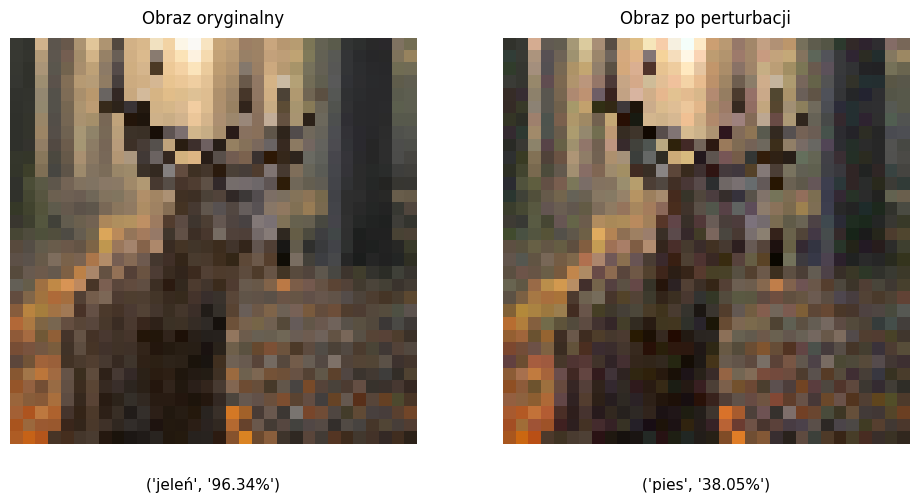

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Jeden rzƒÖd, dwa obrazy

# Obraz oryginalny
axs[0].imshow(img_array[0])
axs[0].axis('off')
axs[0].set_title("Obraz oryginalny", pad=10)
axs[0].text(0.5, -0.1, classify_image_text(img_array), transform=axs[0].transAxes,
            ha='center', va='center', fontsize=11)

# Obraz po perturbacji
axs[1].imshow(adv_image[0])
axs[1].axis('off')
axs[1].set_title("Obraz po perturbacji", pad=10)
axs[1].text(0.5, -0.1, classify_image_text(adv_image), transform=axs[1].transAxes,
            ha='center', va='center', fontsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Podsumowanie:

Dla eps = 0.02 obraz **jelenia** klasyfikowany jako **pies**

In [ ]:
classify_image_details(adv_image)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step

Wynik prawdopodobie≈Ñstw dla ka≈ºdej z klas:
0: samolot: 0.0001
1: samoch√≥d: 0.0001
2: ptak: 0.0731
3: kot: 0.2104
4: jele≈Ñ: 0.1973
5: pies: 0.3805
6: ≈º√≥≈Çw: 0.0247
7: je≈º: 0.1125
8: kon: 0.0002
9: statek: 0.0011

Numer przewidzianej klasy: 5

Z prawdopodobie≈Ñstwem: 38.05%

To prawdopodobnie pies


### Przyk≈Çad drugi
Przeprowadzenie ataku FGSM (Fast Gradient Sign Method) na wyra≈∫niejszym obrazie
>Obraz wyra≈∫ny 512x512 pikseli w celu pokazania perturbacji

Rozmiar obrazu po klasyfikacji: (1, 512, 512, 3)


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

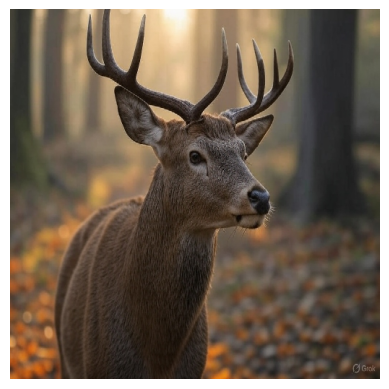

In [ ]:
img_array_2 = prepare_image_512(img_path)

print(f"Rozmiar obrazu po klasyfikacji: {img_array_2.shape}")
plt.imshow(img_array_2[0])
plt.axis('off')

ATAK

> W ramach test√≥w mo≈ºna sprawdziƒá r√≥≈ºne warto≈õƒái **epsilon**

In [ ]:
adv_image_2 = fast_gradient_method(model, img_array_2, eps=0.02, norm=np.inf, clip_min=0.0, clip_max=1.0)

Reprezentacja wynik√≥w

In [ ]:
from PIL import Image

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 126ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 311ms/step


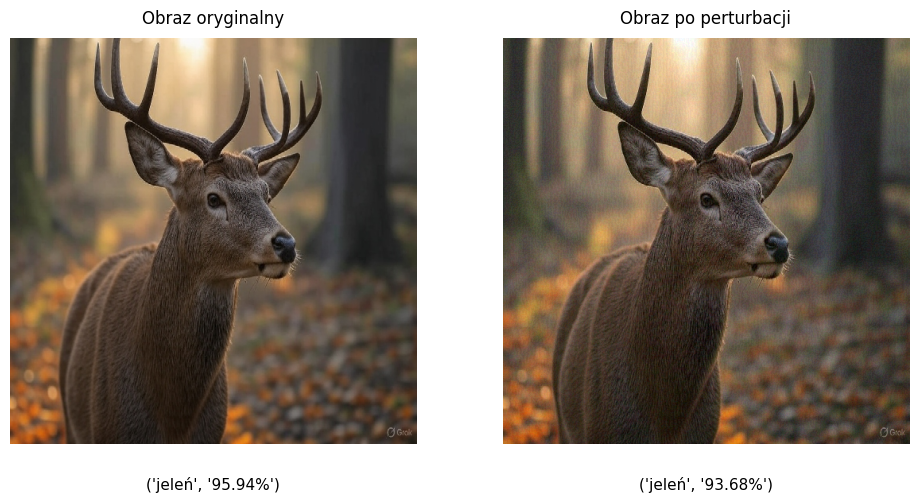

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Jeden rzƒÖd, dwa obrazy

# Obraz oryginalny
axs[0].imshow(img_array_2[0])
axs[0].axis('off')
axs[0].set_title("Obraz oryginalny", pad=10)

'''
# Przeskalowanie do 32x32 piksele
img_512 = img_array_2[0]  # teraz kszta≈Çt: (512, 512, 3)

# Przeskalowanie do 32x32
img_pil = Image.fromarray((img_512 * 255).astype(np.uint8))  # konwersja do uint8
img_resized = img_pil.resize((32, 32))

# Zamiana z powrotem na NumPy i normalizacja
img_array_32 = np.array(img_resized) / 255.0

# Dodanie z powrotem wymiaru batchowego
img_array_32 = np.expand_dims(img_array_32, axis=0)
'''

axs[0].text(0.5, -0.1, classify_image_text(img_array_2), transform=axs[0].transAxes,
            ha='center', va='center', fontsize=11)

# Obraz po perturbacji
axs[1].imshow(adv_image_2[0])
axs[1].axis('off')
axs[1].set_title("Obraz po perturbacji", pad=10)

'''
# Przeskalowanie do 32x32 piksele
adv_512 = adv_array_2[0]  # teraz kszta≈Çt: (512, 512, 3)

# Przeskalowanie do 32x32
adv_pil = Image.fromarray((adv_512 * 255).astype(np.uint8))  # konwersja do uint8
adv_resized = adv_pil.resize((32, 32))

# Zamiana z powrotem na NumPy i normalizacja
adv_array_32 = np.array(adv_resized) / 255.0

# Dodanie z powrotem wymiaru batchowego
adv_array_32 = np.expand_dims(adv_array_32, axis=0)
'''

axs[1].text(0.5, -0.1, classify_image_text(adv_image_2), transform=axs[1].transAxes,
            ha='center', va='center', fontsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Podsumowanie:

Dla eps = 0.02 obraz **jelenia** klasyfikowany **poprawnie**

In [ ]:
classify_image_details(adv_image_2)